# Lead Score Project

### Build Machine Model to identify Quality Leads

In [3]:
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
# reading csv files
data1 = pd.read_csv(r'C:\Users\axq200003\OneDrive - The University of Texas at Dallas\Documents\Prospect_FS_DS Assessment.csv')
data2 = pd.read_csv(r'C:\Users\axq200003\OneDrive - The University of Texas at Dallas\Documents\Visitor_Activity_FS_DS.csv')

In [5]:
# using merge function by setting how='outer'
data = pd.merge(data1, data2, 
                   on='Prospect_ID', 
                   how='outer')

In [6]:
len(data)

4003

In [7]:
data.head(10)

,Prospect_ID,Campaign_ID_x,Company,Job_Title,Score,Source,Lead_Status,ID,Campaign_ID_y,Type,Activity_Name,Activity_Details
0,18258198,2013.0,Brock Tech,Chief of Digital Marketing,65.0,Website,Open,8.238187e+09,2005.0,View,Page View,Service
1,18258198,2013.0,Brock Tech,Chief of Digital Marketing,65.0,Website,Open,3.433321e+09,2019.0,Registered Webinar,Webinar,The Hidden Mystery Behind AI
2,18441354,2005.0,Myxable Co.,Financial Analyst,66.0,Twitter,Open,4.631068e+09,2016.0,View,Form,Form A
3,18441354,2005.0,Myxable Co.,Financial Analyst,66.0,Twitter,Open,1.906444e+09,2019.0,View,Page View,Team
4,18642577,2009.0,Polymeris,Procurement Manager,60.0,Website,Qualified,2.172596e+09,2013.0,Click,Email Tracker,www.xyz.contactus
5,18642577,2009.0,Polymeris,Procurement Manager,60.0,Website,Qualified,5.829623e+09,2005.0,View,Page View,Product
6,18664142,2009.0,HeidieX,Procurement Manager,65.0,Instagram,Open,3.170350e+09,2016.0,View,Multivariate Landing,NaN
7,18664142,2009.0,HeidieX,Procurement Manager,65.0,Instagram,Open,2.120398e+09,2001.0,View,Page View,Service
8,18344212,2013.0,Myxable Co.,Senior Director of B2B Marketing,72.0,Instagram,Closed,8.080449e+09,2005.0,View,Page View,Contact Us
9,18344212,2013.0,Myxable Co.,Senior Director of B2B Marketing,72.0,Instagram,Closed,8.945990e+09,2001.0,Registered Webinar,Webinar,12 Questions Answered About AI


In [8]:
print(data.isnull().sum())

Prospect_ID           0
Campaign_ID_x         1
Company               1
Job_Title             1
Score                 1
Source                1
Lead_Status           1
ID                    4
Campaign_ID_y         4
Type                  4
Activity_Name         4
Activity_Details    429
dtype: int64


In [9]:
#Drop prospect, ID & Campaign ID
data = data.drop(data.columns[[0,7]],axis = 1)

In [10]:
#replace missing activity details with multivariate landing
data['Activity_Details'].fillna("Multivariate Landing", inplace = True)

In [11]:
data = data.dropna()

In [12]:
print(data.isnull().sum())

Campaign_ID_x       0
Company             0
Job_Title           0
Score               0
Source              0
Lead_Status         0
Campaign_ID_y       0
Type                0
Activity_Name       0
Activity_Details    0
dtype: int64


In [13]:
data.shape

(3998, 10)

# Data Visualization/Analysis/Manipulation

In [14]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Campaign_ID_x,3998.0,2008.550775,6.598292,2000.0,2004.0,2009.0,2016.0,2019.0
Score,3998.0,67.323912,18.143146,36.0,51.0,67.0,83.0,98.0
Campaign_ID_y,3998.0,2008.340170,6.615903,2000.0,2001.0,2009.0,2013.0,2019.0


In [15]:
#create binomial column for Lead status #explain process in PPT - aim to create high quality +definition
def x(Lead_Status):
    if Lead_Status == 'Closed':
        return 1
    else:
        return 0

In [16]:
data['B_LeadStatus'] = data['Lead_Status'].apply(x)

<AxesSubplot:xlabel='B_LeadStatus', ylabel='Score'>

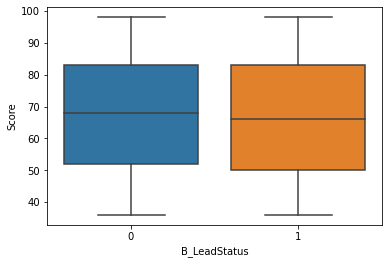

In [17]:
sns.boxplot(x='B_LeadStatus', y='Score', data=data)
#No outlier, pretty spread out evenly

<AxesSubplot:xlabel='Source', ylabel='count'>

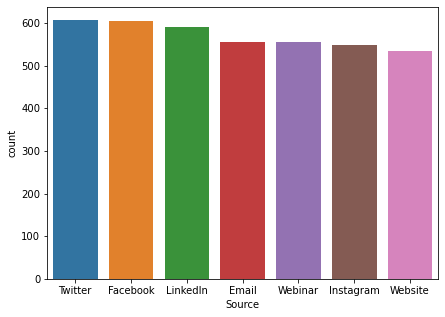

In [18]:
#plot graph on type of source - count
plt.figure(figsize=(7,5))
sns.countplot(x='Source', data=data, order = data['Source'].value_counts().index)

In [19]:
#count top 8 job titles
data["Job_Title"].value_counts().head(8)

Data Scientist                      349
Head of Learning and Development    303
VP of Business                      285
Financial Analyst                   283
Manager of Business Development     275
Contingent Worker                   271
Director of Marketing               271
Senior Director of B2B Marketing    266
Name: Job_Title, dtype: int64

In [20]:
order = ['Data Scientist',
'Head of Learning and Development',
'VP of Business',
'Financial Analyst',
'Manager of Business Development',
'Contingent Worker',
'Director of Marketing',
'Senior Director of B2B Marketing']

<AxesSubplot:xlabel='Job_Title', ylabel='count'>

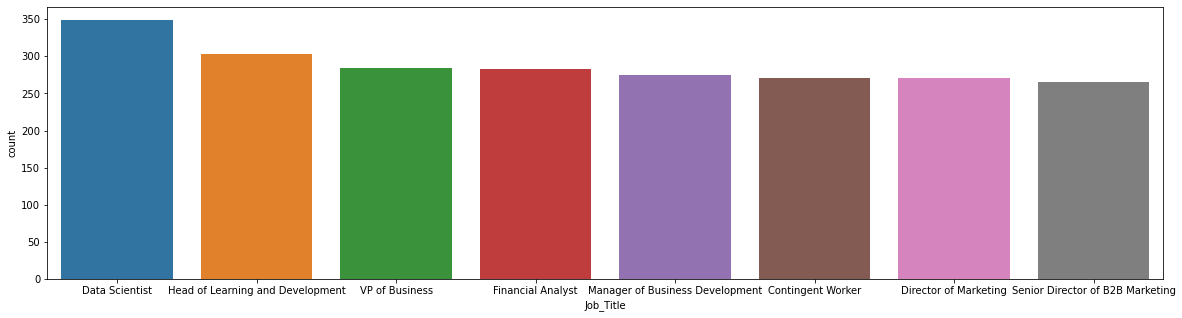

In [21]:
#plot barchart for top 8 job titles 
plt.figure(figsize=(20,5))
sns.countplot(x='Job_Title',data=data,order = order) 

In [22]:
data["Activity_Name"].value_counts()

Page View               1059
Webinar                  716
File                     492
Email Tracker            458
Email                    450
Multivariate Landing     425
Form                     398
Name: Activity_Name, dtype: int64

<AxesSubplot:xlabel='Activity_Name', ylabel='count'>

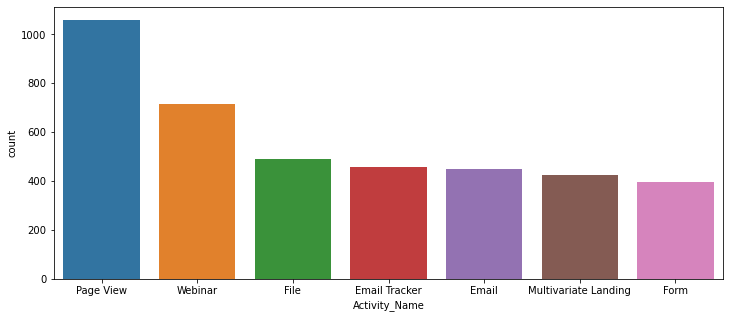

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(x="Activity_Name",data=data,order = data['Activity_Name'].value_counts().index)

In [24]:
data["Type"].value_counts()

View                  2347
Registered Webinar     546
Click                  458
Open                   194
Attended Webinar       170
Resubscribed           122
Unsubscribe Page        58
Bounced                 51
Success                 27
Spam Complaint          25
Name: Type, dtype: int64

In [25]:
data["Lead_Status"].value_counts() 

Open          1033
Qualified     1029
Contacting     997
Closed         939
Name: Lead_Status, dtype: int64

In [26]:
# Correlation with respect to binomial lead status
data.corr()['B_LeadStatus'].sort_values()['Score']

-0.0226750098063839

<AxesSubplot:xlabel='Job_Title', ylabel='count'>

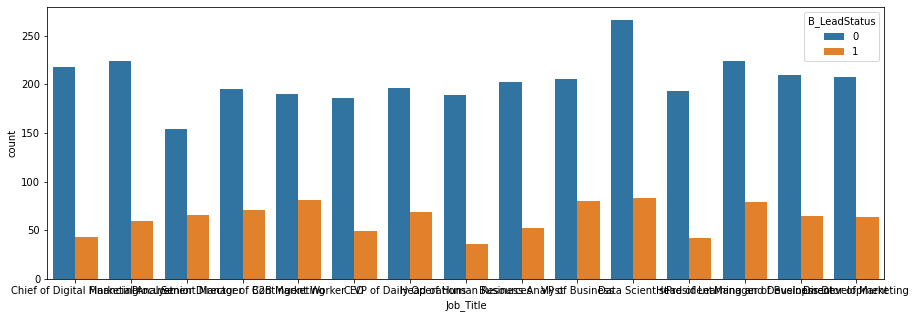

In [27]:
#plot Job title respective to lead status 
plt.figure(figsize=(15,5))
sns.countplot(x="Job_Title",data=data, hue='B_LeadStatus')

[Text(0.5, 0, 'Source'),
 Text(0, 0.5, 'Total Count'),
 Text(0.5, 1.0, 'Lead Status respective to Type of Source')]

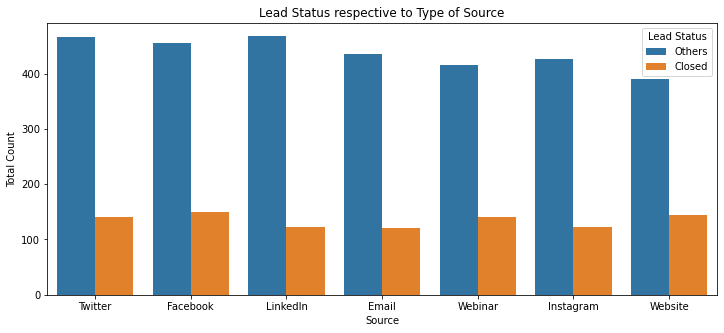

In [28]:
#plot Source respective to lead status 
plt.figure(figsize=(12,5))
ab = sns.countplot(x="Source",data=data, hue='B_LeadStatus',order = data['Source'].value_counts().index)
ab.legend(bbox_to_anchor= (1, 1) ,fontsize = 10,title="Lead Status",labels=['Others', 'Closed'])
ab.set(xlabel='Source',
       ylabel='Total Count',
       title='Lead Status respective to Type of Source')
#website, webinar and facebook resulted in highest closed deals

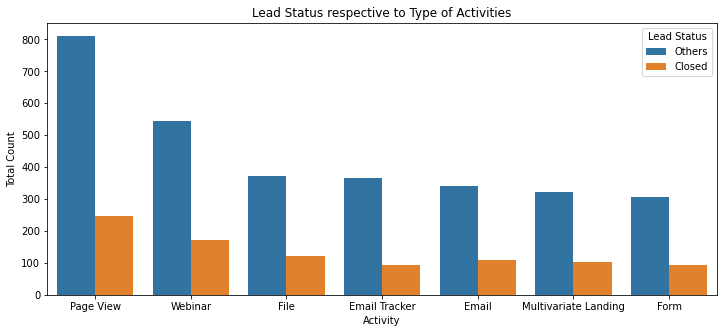

In [29]:
#plot Activity Name respective to lead status 
plt.figure(figsize=(12,5))
ax = sns.countplot(x="Activity_Name",data=data, hue='B_LeadStatus',order = data['Activity_Name'].value_counts().index)
ax.set(xlabel='Activity',
       ylabel='Total Count',
       title='Lead Status respective to Type of Activities')
ax.legend(title="Lead Status",labels=['Others', 'Closed'])

In [30]:
data['Campaign_ID_y'].unique()

array([2005., 2019., 2016., 2013., 2001., 2000., 2009., 2004.])

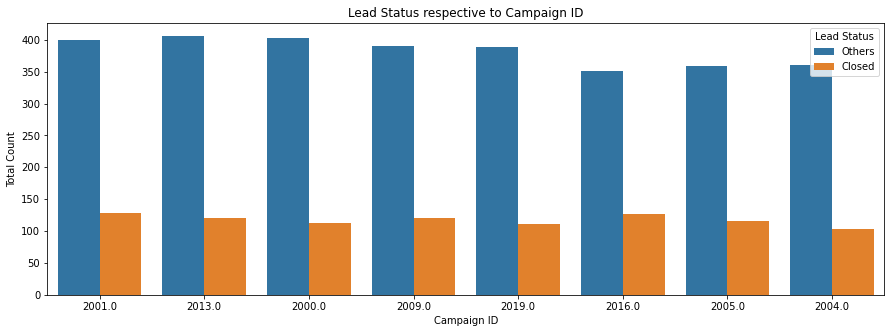

In [31]:
plt.figure(figsize=(15,5))
az = sns.countplot(x="Campaign_ID_y",data=data, hue='B_LeadStatus',order = data['Campaign_ID_y'].value_counts().index)
az.set(xlabel='Campaign ID',
       ylabel='Total Count',
       title='Lead Status respective to Campaign ID')
az.legend(title="Lead Status",labels=['Others', 'Closed'])


In [32]:
data.groupby("Campaign_ID_y")["B_LeadStatus"].value_counts() 

Campaign_ID_y  B_LeadStatus
2000.0         0               403
               1               113
2001.0         0               400
               1               129
2004.0         0               361
               1               103
2005.0         0               359
               1               115
2009.0         0               390
               1               120
2013.0         0               406
               1               121
2016.0         0               351
               1               127
2019.0         0               389
               1               111
Name: B_LeadStatus, dtype: int64

# Model Building

In [33]:
leads_response_columns = ['B_LeadStatus']
leads_numeric_columns = ['Score']

#split data for training, remove extras

leads_x = pd.get_dummies(data.drop(['Lead_Status','B_LeadStatus'], axis=1),drop_first=True)
leads_y = data[leads_response_columns]

leads_x_train, leads_x_test, leads_y_train, leads_y_test = train_test_split(leads_x,
                                                                            leads_y,
                                                                            train_size=0.7,
                                                                            test_size=0.3,
                                                                            random_state=101)

In [34]:
leads_x.select_dtypes(['object']).columns

Index([], dtype='object')

In [35]:
leads_x

,Campaign_ID_x,Score,Campaign_ID_y,Company_Bryxham,Company_Circuit City,Company_Gooyer,Company_HeidieX,Company_Landon's,Company_Lexinton Rig Inc,Company_Marxel,...,Activity_Details_Product,Activity_Details_Register for this new deal,Activity_Details_Service,Activity_Details_Team,Activity_Details_The Hidden Mystery Behind AI,Activity_Details_Three Keys to your success,Activity_Details_Whitepaper,Activity_Details_www.xyz.com,Activity_Details_www.xyz.contactus,Activity_Details_www.xyz.whitepaper
0,2013.0,65.0,2005.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2013.0,65.0,2019.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2005.0,66.0,2016.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2005.0,66.0,2019.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2009.0,60.0,2013.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3997,2013.0,81.0,2009.0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3998,2001.0,96.0,2000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3999,2001.0,96.0,2000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4000,2005.0,38.0,2000.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
scaler = StandardScaler()
scaler = scaler.fit(leads_x_train[leads_numeric_columns])

### Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
import sklearn.metrics as metrics

In [38]:
rfc = RandomForestClassifier(n_estimators = 15,max_features='auto', random_state = 101)

In [39]:
# fit the model with the training data
rfc.fit(leads_x_train,leads_y_train)

C:\Users\AXQ200~1\AppData\Local\Temp/ipykernel_36260/1126726918.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(n_estimators=15, random_state=101)

In [40]:
# predict the target on the dataset
preds = rfc.predict(leads_x_test)

In [41]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

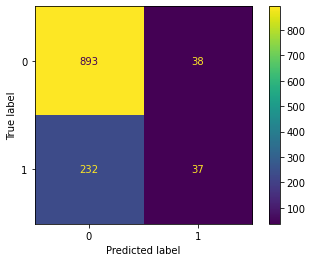

In [42]:
plot_confusion_matrix(rfc,leads_x_test,leads_y_test)

In [43]:
print(classification_report(leads_y_test,preds))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       931
           1       0.49      0.14      0.22       269

    accuracy                           0.78      1200
   macro avg       0.64      0.55      0.54      1200
weighted avg       0.73      0.78      0.72      1200



In [44]:
confusion = metrics.confusion_matrix(leads_y_test,preds)

In [45]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [46]:
# Let's see the sensitivity of our model
trainsensitivity= TP / float(TP+FN)
trainsensitivity

0.137546468401487

In [47]:
# Let us calculate specificity
trainspecificity= TN / float(TN+FP)
trainspecificity

0.9591836734693877

In [48]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.04081632653061224


In [49]:
# Positive predictive value 
print (TP / float(TP+FP))

0.49333333333333335


In [50]:
# Negative predictive value
print(TN / float(TN+ FN))

0.7937777777777778


In [51]:
accuracy = metrics.accuracy_score(leads_y_test,preds)
auc_score = metrics.roc_auc_score(leads_y_test,preds)

In [52]:
print(accuracy)
print(auc_score) 

0.775
0.5483650709354373


In [53]:
from sklearn.metrics import r2_score
r2_score(leads_y_test, preds)

-0.29372821325751985

In [54]:
pip install pydot

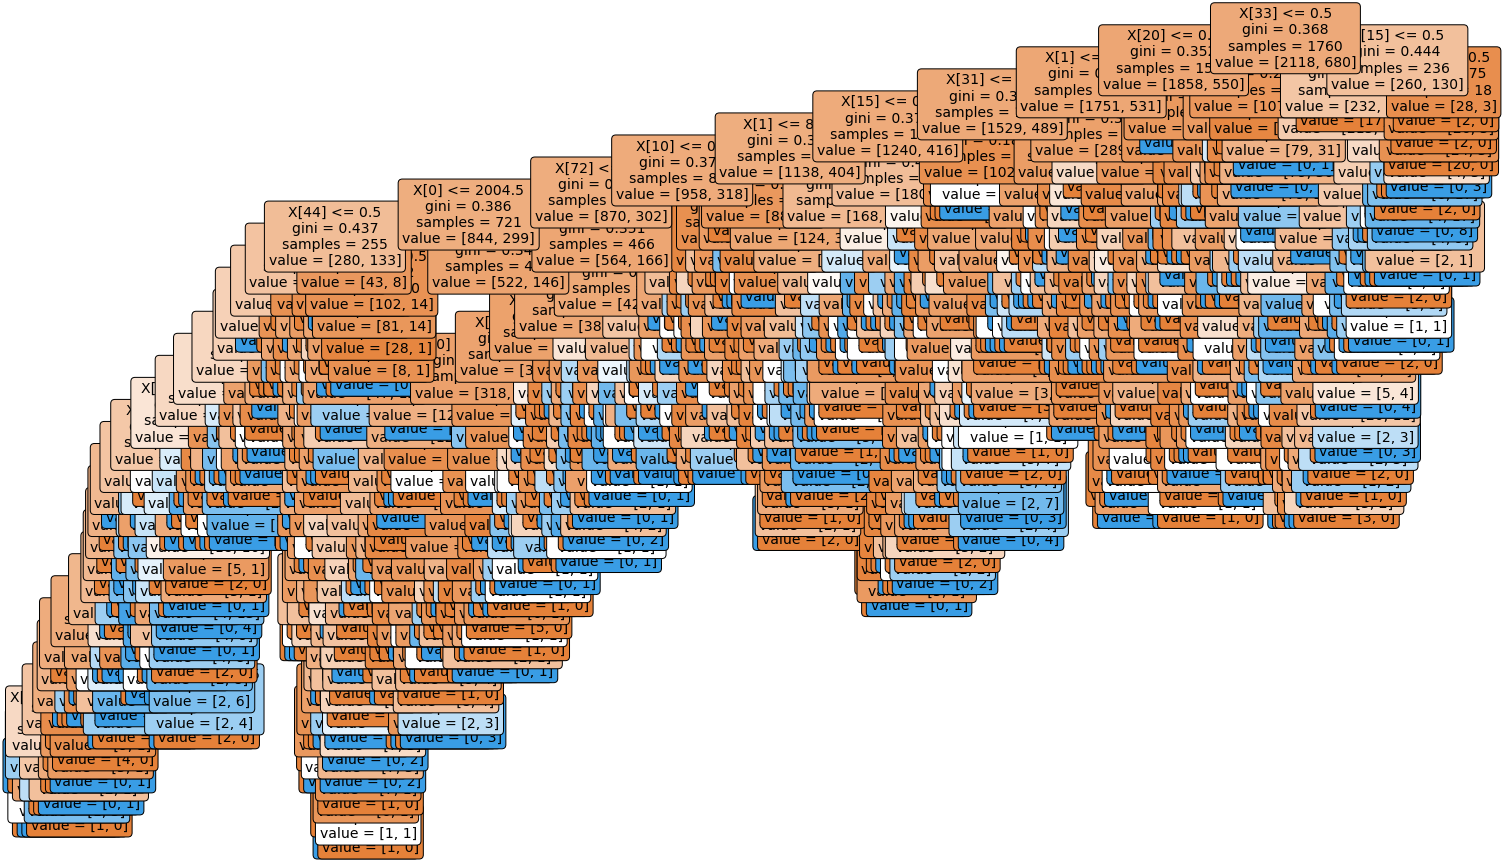

In [55]:
import pydot
# Pull out one tree from the forest
Tree = rfc.estimators_[1]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

In [56]:
# Top 5 important features

feat_importances = pd.Series(rfc.feature_importances_, index=leads_x_train.columns)
feat_importances.nlargest(5).iplot(kind='barh')

### Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_clf = LogisticRegression(C=1.9909999999999997, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, n_jobs=None, penalty='l2',
                   random_state=7, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
log_clf.fit(leads_x_train,leads_y_train)

C:\Users\axq200003\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LogisticRegression(C=1.9909999999999997, class_weight='balanced',
                   random_state=7, solver='liblinear')

In [60]:
predLR=log_clf.predict_proba(leads_x_test)

In [61]:
log_roc_auc=roc_auc_score(leads_y_test,predLR[:,1])

(2.0, 0.0)

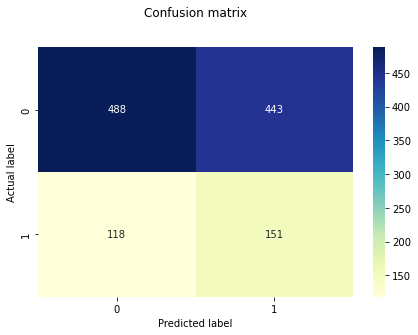

In [62]:
# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(leads_y_test, log_clf.predict(leads_x_test))
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.ylim(2,0)

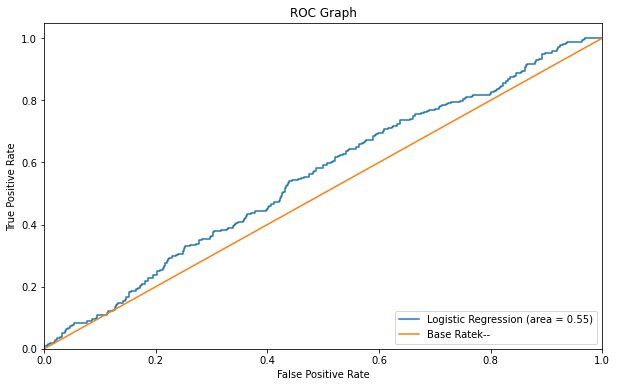

In [63]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(leads_y_test, log_clf.predict_proba(leads_x_test)[:,1])
plt.figure(figsize=(10, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

The AUC Score can be further increased by using feature engineering and using higher computation power to fine-tune the hyper-parameters of the model.